In [3]:
from AD_analysis import *
import Atmospheric_diffraction as atm_shift
import numpy as np

In [4]:
def observation_transmission(output_parameters):
    integ_transmission=[]
    for i in range(0,len(output_parameters['wave_wavelengths'])):
        trans=0
        for o in range(0,len(output_parameters['wave_transmissions'])):
            trans=trans+output_parameters['wave_transmissions'][o][i]
        trans_mean=trans/len(output_parameters['wave_transmissions'])
        integ_transmission.append(trans_mean)

    return integ_transmission




Normalised VIS/NIR Integration Trans Graphs


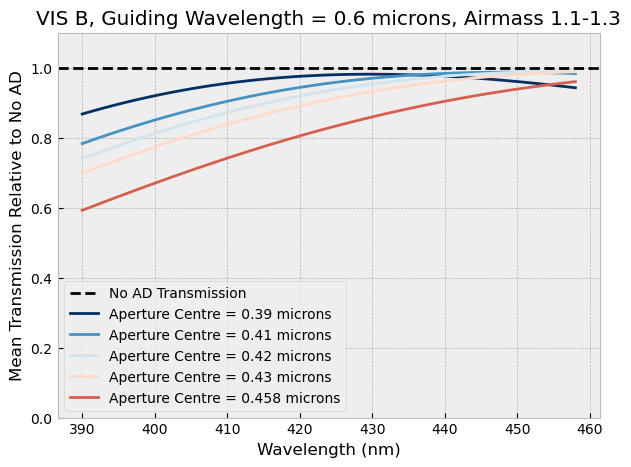

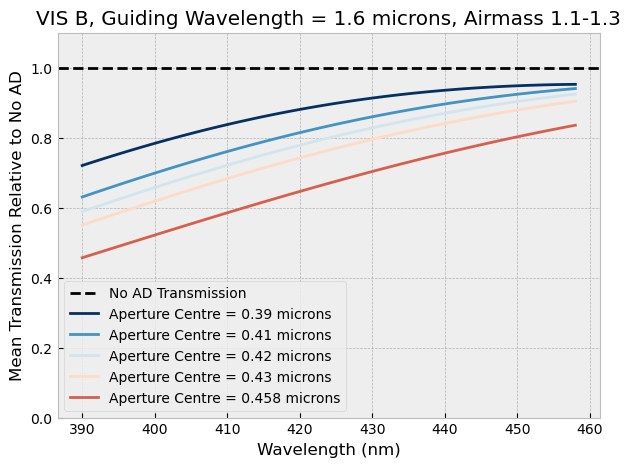

In [11]:
airmasses=np.linspace(1.1,1.3,21)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[fibre_min.to(u.micron).value,.41,.42,.43,fibre_max.to(u.micron).value]
guides=[0.6,1.6]

for guide_waveref in guides:
    plt.figure(figsize=[7,5])
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("{} {}, Guiding Wavelength = {} microns, Airmass {}-{}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,airmasses[0],airmasses[-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    #plt.plot(analysis.output_parameters['wave_wavelengths'],opt_transmission,color='black',label='Optimal Mean Transmission',linestyle="--")

    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color=cmap.to_rgba(6-count))
        count=count+1
    plt.legend()
    plt.savefig("graphs/VISB_Integ_"+str(guide_waveref)+".png",dpi=600,bbox_inches='tight')
        



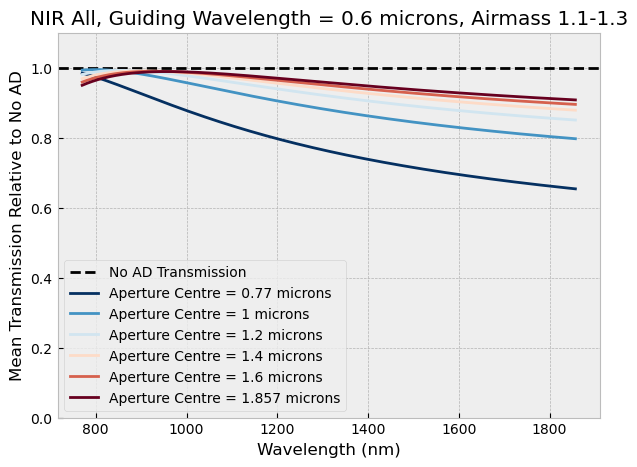

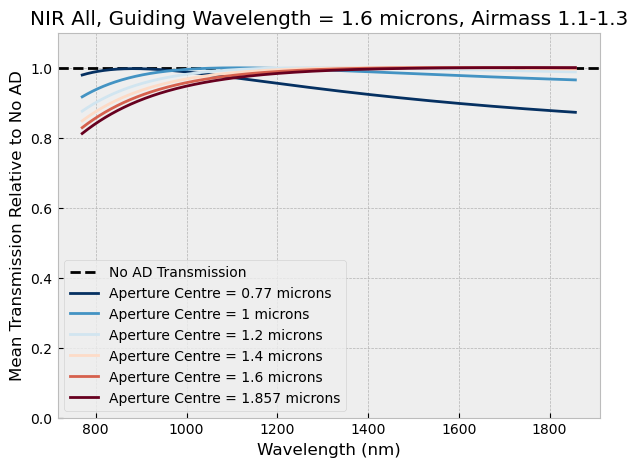

In [12]:
airmasses=np.linspace(1.1,1.3,11)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[fibre_min.to(u.micron).value,1,1.2,1.4,1.6,fibre_max.to(u.micron).value]
guides=[0.6,1.6]

for guide_waveref in guides:
    plt.figure(figsize=[7,5])
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("{} {}, Guiding Wavelength = {} microns, Airmass {}-{}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,airmasses[0],airmasses[-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    #plt.plot(analysis.output_parameters['wave_wavelengths'],opt_transmission,color='black',label='Optimal Mean Transmission',linestyle="--")
    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color=cmap.to_rgba(6-count))
        count=count+1
    plt.legend()
    plt.savefig("graphs/NIRAll_Integ_"+str(guide_waveref)+".png",dpi=600,bbox_inches='tight')

MYRIAM TRANSMISSION

Movement of NIR Fibre Centre from Start to End = 0.4999588231309565 arcsec


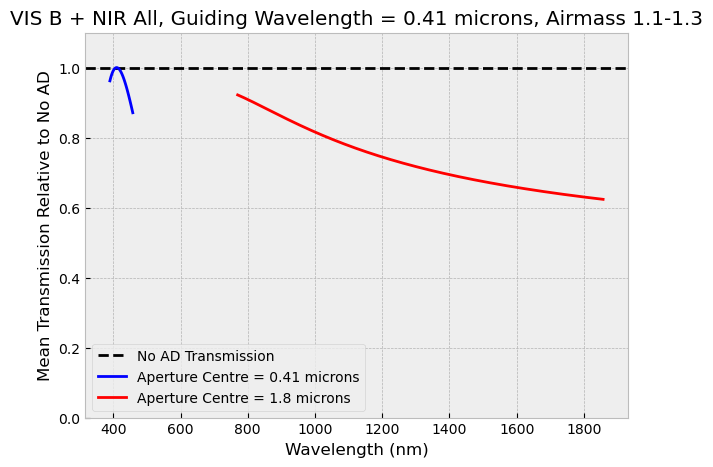

In [13]:
airmasses=np.linspace(1.1,1.3,21)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[0.41]
guides=[0.41]

for guide_waveref in guides:
    plt.figure(figsize=[7,5])
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("VIS B + NIR All, Guiding Wavelength = {} microns, Airmass {}-{}".format(guide_waveref,airmasses[0],airmasses[-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color='blue')
        count=count+1
    plt.legend()
    
airmasses=np.linspace(1.1,1.3,11)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[1.8]
guides=[0.41]

for guide_waveref in guides:
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        fibre_index=abs(int((analysis.output_parameters['wave_wavelengths'][0].value-fibre_val*1000)/1)) #sampling = 1
        print("Movement of NIR Fibre Centre from Start to End = {}".format(abs(analysis.output_parameters['shifts'][0][fibre_index]-analysis.output_parameters['shifts'][-1][fibre_index])))
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)

    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color='red')
        count=count+1
    plt.legend()
    plt.savefig("graphs/Simeultaenous_VISB_NIRAll_Integ.png",dpi=600,bbox_inches='tight')

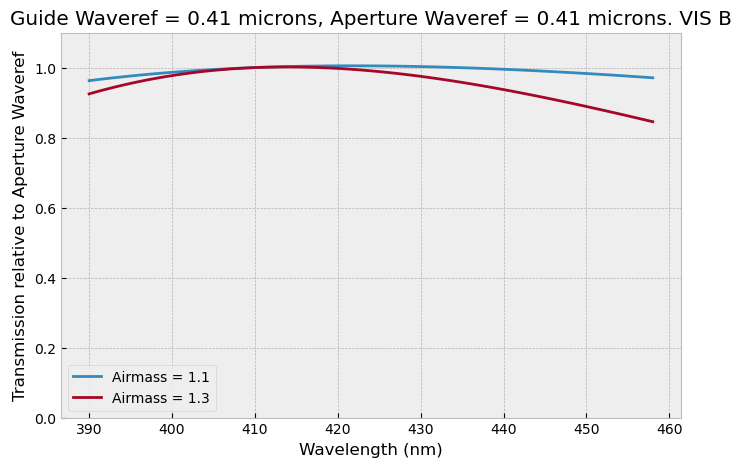

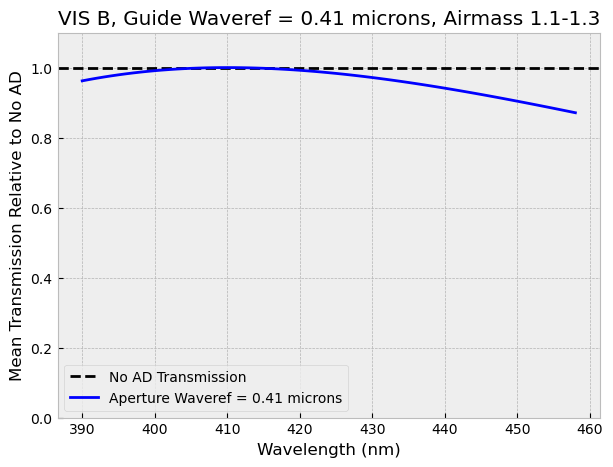

In [6]:
airmasses=np.linspace(1.1,1.3,21)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[0.41]
guides=[0.41]

for guide_waveref in guides:
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1
        plt.figure(figsize=[8,5])
        fibre_index=abs(int((analysis.output_parameters['wave_wavelengths'][0].value-fibre_val*1000)/1)) #sampling = 1
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(analysis.output_parameters['wave_transmissions'][0])/analysis.output_parameters['wave_transmissions'][0][fibre_index],label='Airmass = 1.1')
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(analysis.output_parameters['wave_transmissions'][-1])/analysis.output_parameters['wave_transmissions'][-1][fibre_index],label='Airmass = 1.3')
        plt.ylabel("Transmission relative to Aperture Centre")
        plt.xlabel("Wavelength (nm)")
        plt.ylim(0,1.1)
        plt.legend()
        plt.title("Guide Waveref = 0.41 microns, Aperture Centre = 0.41 microns. VIS B")
        
    plt.figure(figsize=[7,5])
    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("{} {}, Guide Waveref = {} microns, Airmass {}-{}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,airmasses[0],airmasses[-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color='blue')
        count=count+1
    plt.legend()
    

Movement of NIR Fibre Centre from Start to End = 0.4999588231309565 arcsec


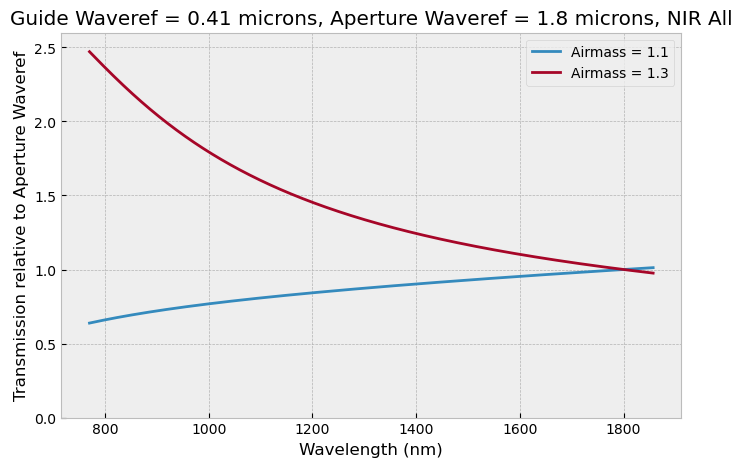

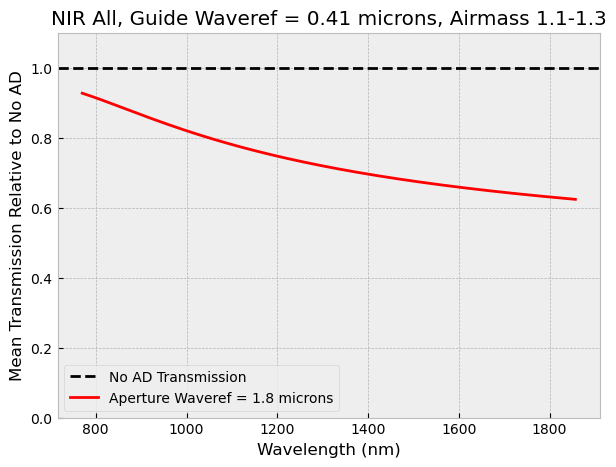

In [7]:
airmasses=np.linspace(1.1,1.3,21)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[1.8]
guides=[0.41]

for guide_waveref in guides:
    
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        fibre_index=abs(int((analysis.output_parameters['wave_wavelengths'][0].value-fibre_val*1000)/1)) #sampling = 1
        print("Movement of NIR Fibre Centre from Start to End = {}".format(abs(analysis.output_parameters['shifts'][0][fibre_index]-analysis.output_parameters['shifts'][-1][fibre_index])))
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
        plt.figure(figsize=[8,5])
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(analysis.output_parameters['wave_transmissions'][0])/analysis.output_parameters['wave_transmissions'][0][fibre_index],label='Airmass = 1.1')
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(analysis.output_parameters['wave_transmissions'][-1])/analysis.output_parameters['wave_transmissions'][-1][fibre_index],label='Airmass = 1.3')
        plt.ylabel("Transmission relative to Aperture Centre")
        plt.xlabel("Wavelength (nm)")
        plt.ylim(0,2.6)
        plt.legend()
        plt.title("Guide Waveref = 0.41 microns, Aperture Centre = 1.8 microns, NIR All")
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.figure(figsize=[7,5])
    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    plt.title("{} {}, Guide Waveref = {} microns, Airmass {}-{}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,airmasses[0],airmasses[-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color='red')
        count=count+1
    plt.legend()


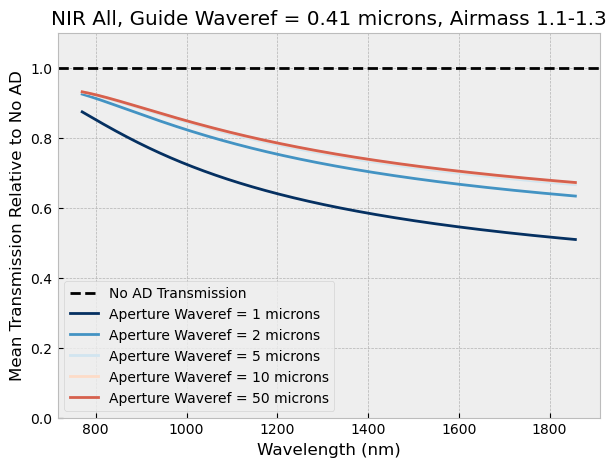

In [8]:
airmasses=np.linspace(1.1,1.3,11)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[1,2,5,10,50]
guides=[0.41]

for guide_waveref in guides:
    
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.figure(figsize=[7,5])
    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("{} {}, Guide Waveref = {} microns, Airmass {}-{}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,airmasses[0],airmasses[-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color=cmap.to_rgba(6-count))
        count=count+1
    plt.legend()


Durham Versions of Normalised Graphs

NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE


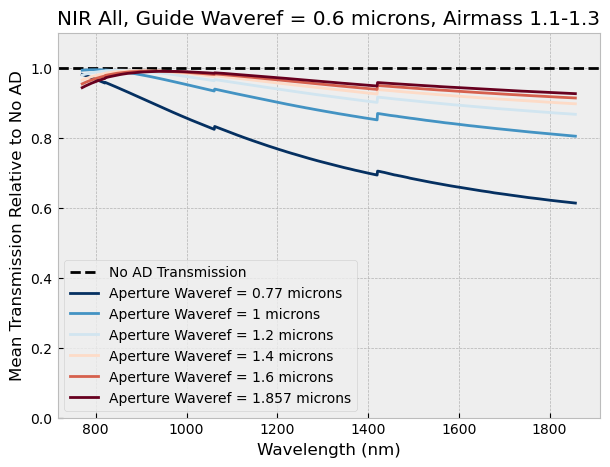

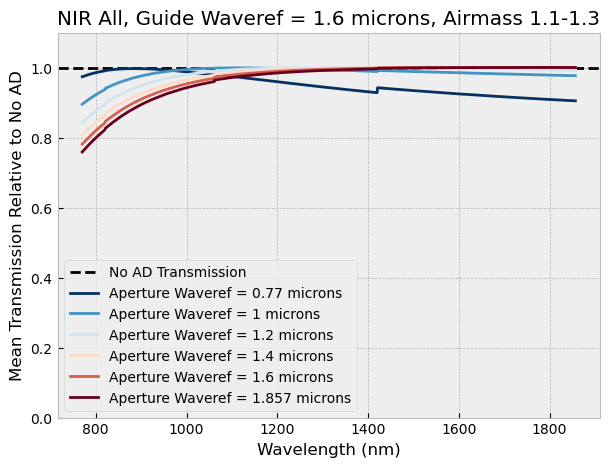

In [9]:
airmasses=np.linspace(1.1,1.3,21)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[fibre_min.to(u.micron).value,1,1.2,1.4,1.6,fibre_max.to(u.micron).value]
guides=[0.6,1.6]

for guide_waveref in guides:
    plt.figure(figsize=[7,5])
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        print("NEW FIBRE")
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical durham",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("{} {}, Guide Waveref = {} microns, Airmass {}-{}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,airmasses[0],airmasses[-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical durham",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color=cmap.to_rgba(6-count))
        count=count+1
    plt.legend()


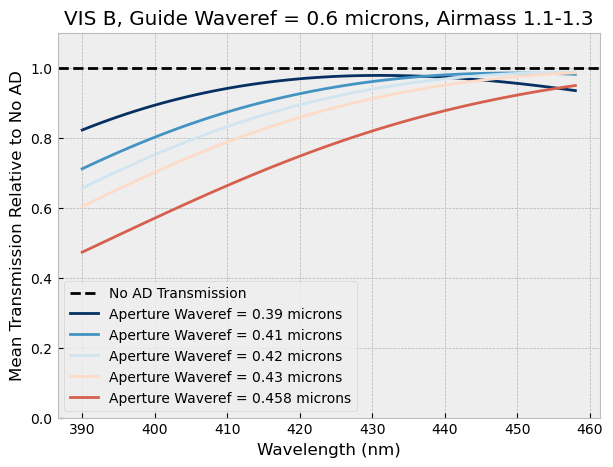

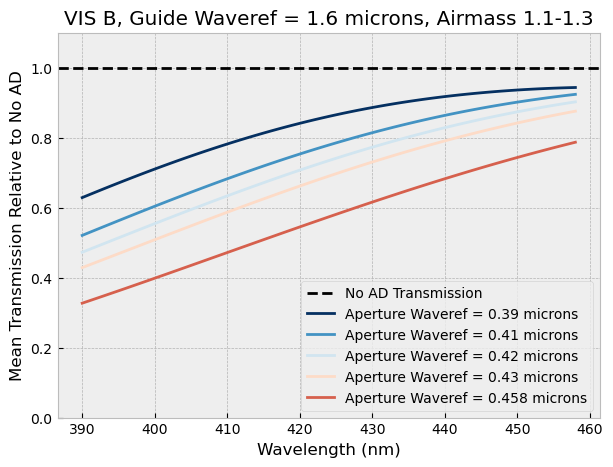

In [10]:
airmasses=np.linspace(1.1,1.3,21)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[fibre_min.to(u.micron).value,.41,.42,.43,fibre_max.to(u.micron).value]
guides=[0.6,1.6]

for guide_waveref in guides:
    plt.figure(figsize=[7,5])
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical durham",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("{} {}, Guide Waveref = {} microns, Airmass {}-{}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,airmasses[0],airmasses[-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical durham",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)

    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color=cmap.to_rgba(6-count))
        count=count+1
    plt.legend()

        

HA Version

HA used
Target goes below Horizon above/below HA of +/- 8.2h
[1.13169713 1.11291664 1.10675931 1.11291664 1.13169713]
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE


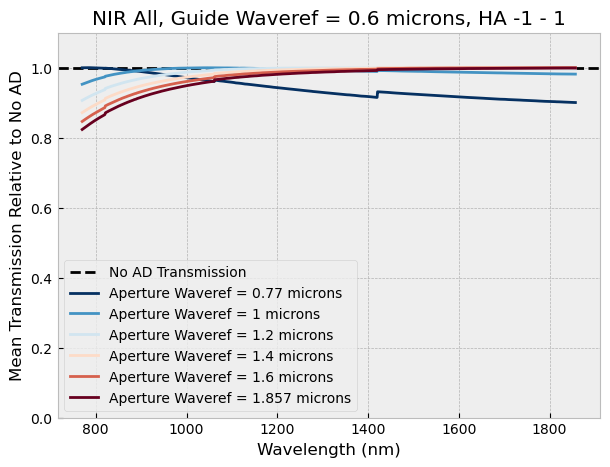

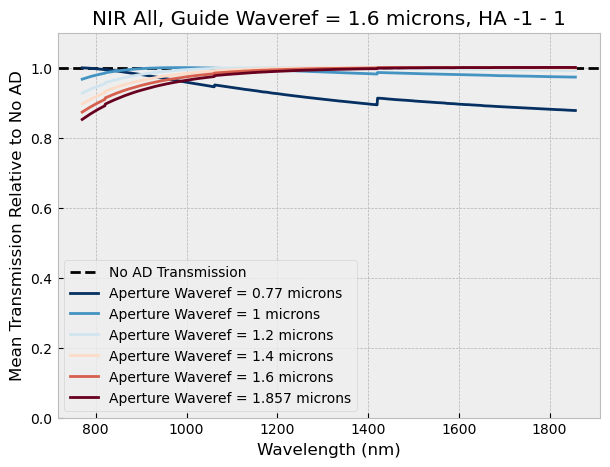

In [11]:
airmasses=np.linspace(1.1,1.3,21)
weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(HA_range=[-1,-0.5,0,0.5,1],targ_dec=-50 * u.degree)
print(analysis.output_parameters['airmasses'])
#analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[fibre_min.to(u.micron).value,1,1.2,1.4,1.6,fibre_max.to(u.micron).value]
guides=[0.6,1.6]


for guide_waveref in guides:
    plt.figure(figsize=[7,5])
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        print("NEW FIBRE")
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical durham",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("{} {}, Guide Waveref = {} microns, HA {} - {}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,analysis.input_parameters['HA_range'][0],analysis.input_parameters['HA_range'][-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical durham",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color=cmap.to_rgba(6-count))
        count=count+1
    plt.legend()

HA used
Target goes below Horizon above/below HA of +/- 8.2h
[1.10675931 1.13704014 1.14293521 1.14939467 1.15643217 1.16406276]
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE
NEW FIBRE


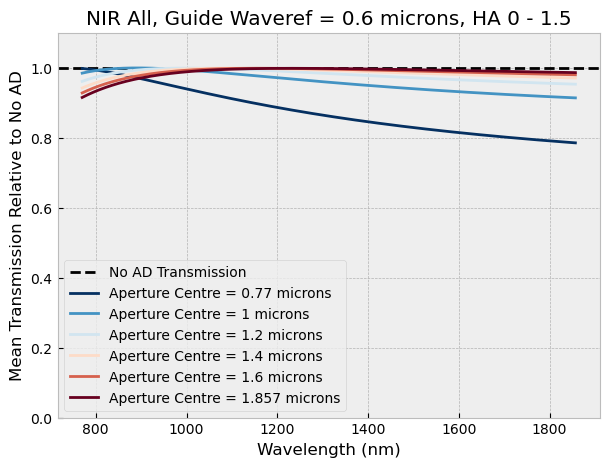

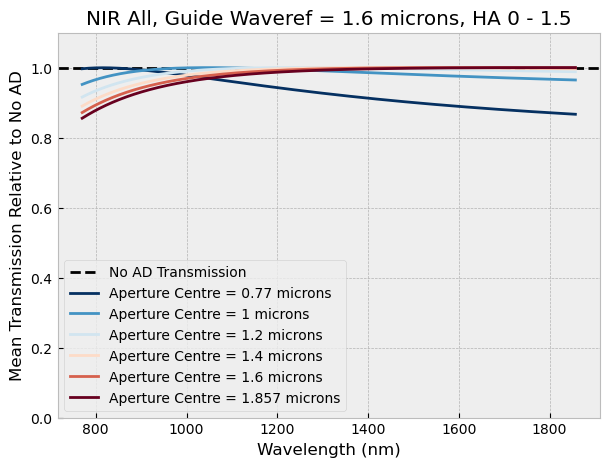

In [17]:

weights = np.arange(1, 7)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.RdBu)

analysis=AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
#analysis.load_airmasses(HA_range=[-3,-1.5,0,1.5,3],targ_dec=-50 * u.degree)
analysis.load_airmasses(HA_range=[0,1.1,1.2,1.3,1.4,1.5],targ_dec=-50 * u.degree)
print(analysis.output_parameters['airmasses'])
#analysis.output_parameters['airmasses']=airmasses
fibre_min=min(analysis.output_parameters['wave_wavelengths'])
fibre_max=max(analysis.output_parameters['wave_wavelengths'])
fibres=[fibre_min.to(u.micron).value,1,1.2,1.4,1.6,fibre_max.to(u.micron).value]
guides=[0.6,1.6]


for guide_waveref in guides:
    plt.figure(figsize=[7,5])
    count=0
    integ_transmissions=[]
    for fibre_val in fibres:
        print("NEW FIBRE")
        analysis.calculate_shifts(fibrecentre_waveref = fibre_val * u.micron,reposition=False, guide_waveref=guide_waveref * u.micron)
        analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
        integ_transmission=observation_transmission(analysis.output_parameters)
        integ_transmissions.append(integ_transmission)
        count=count+1

    plt.ylim(0,1.1)
    plt.ylabel("Mean Transmission Relative to No AD")
    plt.xlabel("Wavelength (nm)")
    plt.axhline(y=1,label='No AD Transmission',color='black',linestyle='--')
    
    plt.title("{} {}, Guide Waveref = {} microns, HA {} - {}".format(analysis.input_parameters['regime'],analysis.input_parameters['band'],guide_waveref,analysis.input_parameters['HA_range'][0],analysis.input_parameters['HA_range'][-1]))

    for i in range(0,len(analysis.output_parameters['shifts'])):
        for o in range(0,len(analysis.output_parameters['shifts'][i])):
            analysis.output_parameters['shifts'][i][o]=0
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
    opt_transmission=observation_transmission(analysis.output_parameters)
    
    count=0
    for i in integ_transmissions:
        plt.plot(analysis.output_parameters['wave_wavelengths'],np.array(i)/np.array(opt_transmission),label='Aperture Centre = {} microns'.format(fibres[count]),color=cmap.to_rgba(6-count))
        count=count+1
    plt.legend()

In [12]:
import Transmission_calculation as trans
Plate_Scale = 3.316 # [mm/arcsec]
Plate_Scale = Plate_Scale*1000 #um/arcsec
lambdas=[770,859,1010,1045,1370,1420,1670,1926]*u.nm
shifts_0=[0,0,0,0,0,0,0,0] #is in um
shifts_30=np.array([212,141,60,50,35,42,100,195])
shifts_45=np.array([366,243,104,87,61,72,173,338])
shifts_50=np.array([436,289,124,103,72,86,205,402])
shifts_60=np.array([633,420,179,150,105,125,298,584])
shifts=np.array([shifts_0,shifts_30,shifts_45,shifts_50,shifts_60])/Plate_Scale*u.arcsec


In [13]:
analysis=AD_analysis()
analysis.output_parameters['wave_wavelengths']=lambdas
analysis.load_airmasses(ZA_range=[0,30,45,50,60])
analysis.output_parameters['shifts']=shifts
analysis.output_parameters['fibre_diameter']=0.6*u.arcsec
analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.001)

raw_trans=analysis.output_parameters['wave_transmissions']

ZA_vals=[0,30,45,50,60]
analysis=AD_analysis()
analysis.output_parameters['wave_wavelengths']=lambdas

analysis.output_parameters['shifts']=[shifts_0]*u.arcsec
analysis.output_parameters['fibre_diameter']=0.6*u.arcsec
for i in range(0,len(ZA_vals)):
    analysis.load_airmasses(ZA_range=[ZA_vals[i]])
    analysis.calculate_transmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.001)
    print("Raw Transmission for ZA = {} for ADC shifts:".format(ZA_vals[i]))
    rounded_vals = [ round(val,3) for val in raw_trans[i]]
    print(rounded_vals)
    normalised_vals=(np.array(raw_trans)[i]/np.array(analysis.output_parameters['wave_transmissions'][0]))
    print("Transmission relative to no AD for ZA = {} for ADC shifts:".format(ZA_vals[i]))
    normalised_vals = [round(elem,3) for elem in normalised_vals]
    print(normalised_vals)
    print("==========================================================")
    

Zenith Angles Used
Zenith Angles Used
Raw Transmission for ZA = 0 for ADC shifts:
[0.425, 0.444, 0.472, 0.478, 0.531, 0.538, 0.572, 0.604]
Transmission relative to no AD for ZA = 0 for ADC shifts:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Zenith Angles Used
Raw Transmission for ZA = 30 for ADC shifts:
[0.369, 0.39, 0.42, 0.426, 0.476, 0.483, 0.514, 0.537]
Transmission relative to no AD for ZA = 30 for ADC shifts:
[0.98, 0.991, 0.998, 0.999, 0.999, 0.999, 0.995, 0.98]
Zenith Angles Used
Raw Transmission for ZA = 45 for ADC shifts:
[0.296, 0.32, 0.351, 0.356, 0.402, 0.408, 0.434, 0.443]
Transmission relative to no AD for ZA = 45 for ADC shifts:
[0.947, 0.975, 0.995, 0.997, 0.998, 0.998, 0.985, 0.943]
Zenith Angles Used
Raw Transmission for ZA = 50 for ADC shifts:
[0.266, 0.29, 0.32, 0.326, 0.369, 0.375, 0.398, 0.4]
Transmission relative to no AD for ZA = 50 for ADC shifts:
[0.93, 0.967, 0.994, 0.996, 0.998, 0.997, 0.98, 0.923]
Zenith Angles Used
Raw Transmission for ZA = 60 for ADC shifts